In [1]:
!pip install azure-storage-blob

In [2]:
from azure.storage.blob import BlobServiceClient

account_name = 'marketmixmodel'
account_key = 'Enter you key here'
container_name = 'datacontainer'

connect_str = f"DefaultEndpointsProtocol=https;AccountName={account_name};AccountKey={account_key};EndpointSuffix=core.windows.net"

blob_service_client = BlobServiceClient.from_connection_string(connect_str)

In [3]:
blob_name = 'MMM_data.xlsx'

In [4]:
blob_name = 'MMM_data.xlsx'

blob_client = blob_service_client.get_blob_client(container=container_name, blob=blob_name)
with open(blob_name, "wb") as download_file:
    download_file.write(blob_client.download_blob().readall())

In [5]:
import pandas as pd

data = pd.read_excel(blob_name)
data.head()

,TV Manufacturing Brand,DATE,DEMAND,Consumer Price Index (CPI),Consumer Confidence Index(CCI),Producer Price Index (PPI),Unit Price ($),POS/ Supply Data,SALES ($),Advertising Expenses (SMS),Advertising Expenses(Newspaper ads),Advertising Expenses(Radio),Advertising Expenses(TV),Advertising Expenses(Internet),GRP (NewPaper ads),GRP(SMS),GRP(Radio,GRP(Internet),GRP(TV)
0,TV Manufacturing & Supplier Unit,2010-01-01,4384,104.9,96.3,106.7,361.62,4240,1533268.80,77.4819,14.104193,112.3370,1479.4565,722.571,95.333,11.8398,91.0000,276.3636,756.5909
1,TV Manufacturing & Supplier Unit,2010-01-02,4366,104.9,96.3,106.7,361.62,4266,1542670.92,73.4783,13.298758,105.7133,1369.8913,717.857,114.957,27.8039,111.9091,291.3182,860.1364
2,TV Manufacturing & Supplier Unit,2010-01-03,4006,104.9,96.3,106.7,361.62,4206,1520973.72,80.6093,13.200691,108.7702,1428.0645,653.333,113.090,0.0000,94.6364,282.7273,751.9545
3,TV Manufacturing & Supplier Unit,2010-01-04,4076,104.9,96.3,106.7,361.62,4176,1510125.12,65.9319,12.721429,93.3065,1309.3548,622.095,72.442,0.0000,98.5909,306.3182,749.4545
4,TV Manufacturing & Supplier Unit,2010-01-05,4834,104.9,96.3,106.7,361.62,5234,1892719.08,77.4819,14.104193,112.3370,1479.4565,722.571,95.333,11.8398,91.0000,276.3636,756.5909


In [6]:
data.isna().sum()

TV Manufacturing Brand                 0
DATE                                   0
DEMAND                                 0
Consumer Price Index (CPI)             0
Consumer Confidence Index(CCI)         0
Producer Price Index (PPI)             0
Unit Price ($)                         0
POS/ Supply Data                       0
SALES ($)                              0
Advertising Expenses (SMS)             0
Advertising Expenses(Newspaper ads)    0
Advertising Expenses(Radio)            0
Advertising Expenses(TV)               0
Advertising Expenses(Internet)         0
GRP (NewPaper ads)                     0
GRP(SMS)                               0
GRP(Radio                              0
GRP(Internet)                          0
GRP(TV)                                0
dtype: int64

In [7]:
# Inspect column names
print(data.columns)
# Strip whitespace from column names
data.columns = data.columns.str.strip()

# Inspect column names again
print(data.columns)

Index(['TV Manufacturing Brand', 'DATE', 'DEMAND ',
       'Consumer Price Index (CPI)', 'Consumer Confidence Index(CCI)',
       'Producer Price Index (PPI)', 'Unit Price ($)', 'POS/ Supply Data',
       'SALES ($)', 'Advertising Expenses (SMS)',
       'Advertising Expenses(Newspaper ads)', 'Advertising Expenses(Radio)',
       'Advertising Expenses(TV)', 'Advertising Expenses(Internet)',
       'GRP (NewPaper ads)', 'GRP(SMS)', 'GRP(Radio', 'GRP(Internet)',
       'GRP(TV)'],
      dtype='object')
Index(['TV Manufacturing Brand', 'DATE', 'DEMAND',
       'Consumer Price Index (CPI)', 'Consumer Confidence Index(CCI)',
       'Producer Price Index (PPI)', 'Unit Price ($)', 'POS/ Supply Data',
       'SALES ($)', 'Advertising Expenses (SMS)',
       'Advertising Expenses(Newspaper ads)', 'Advertising Expenses(Radio)',
       'Advertising Expenses(TV)', 'Advertising Expenses(Internet)',
       'GRP (NewPaper ads)', 'GRP(SMS)', 'GRP(Radio', 'GRP(Internet)',
       'GRP(TV)'],
      dtype

In [8]:
# Exclude non-numeric columns
numeric_data = data.select_dtypes(include=[float, int])

# Calculate correlation matrix
correlation_matrix = numeric_data.corr()

# Display correlation matrix
print(correlation_matrix)

# Specifically look at the correlations with 'DEMAND' and 'SALES ($)'
demand_corr = correlation_matrix['DEMAND'].sort_values(ascending=False)
sales_corr = correlation_matrix['SALES ($)'].sort_values(ascending=False)

print("Correlation with Demand:\n", demand_corr)
print("Correlation with Sales:\n", sales_corr)

                                       DEMAND  Consumer Price Index (CPI)  \
DEMAND                               1.000000                    0.290456   
Consumer Price Index (CPI)           0.290456                    1.000000   
Consumer Confidence Index(CCI)      -0.479217                   -0.553533   
Producer Price Index (PPI)           0.223088                    0.279197   
Unit Price ($)                      -0.022060                    0.261890   
POS/ Supply Data                     0.921392                    0.212692   
SALES ($)                            0.918454                    0.229006   
Advertising Expenses (SMS)           0.024817                    0.050289   
Advertising Expenses(Newspaper ads)  0.046400                    0.050299   
Advertising Expenses(Radio)          0.003047                    0.041638   
Advertising Expenses(TV)             0.047205                    0.051172   
Advertising Expenses(Internet)       0.048636                   -0.019184   

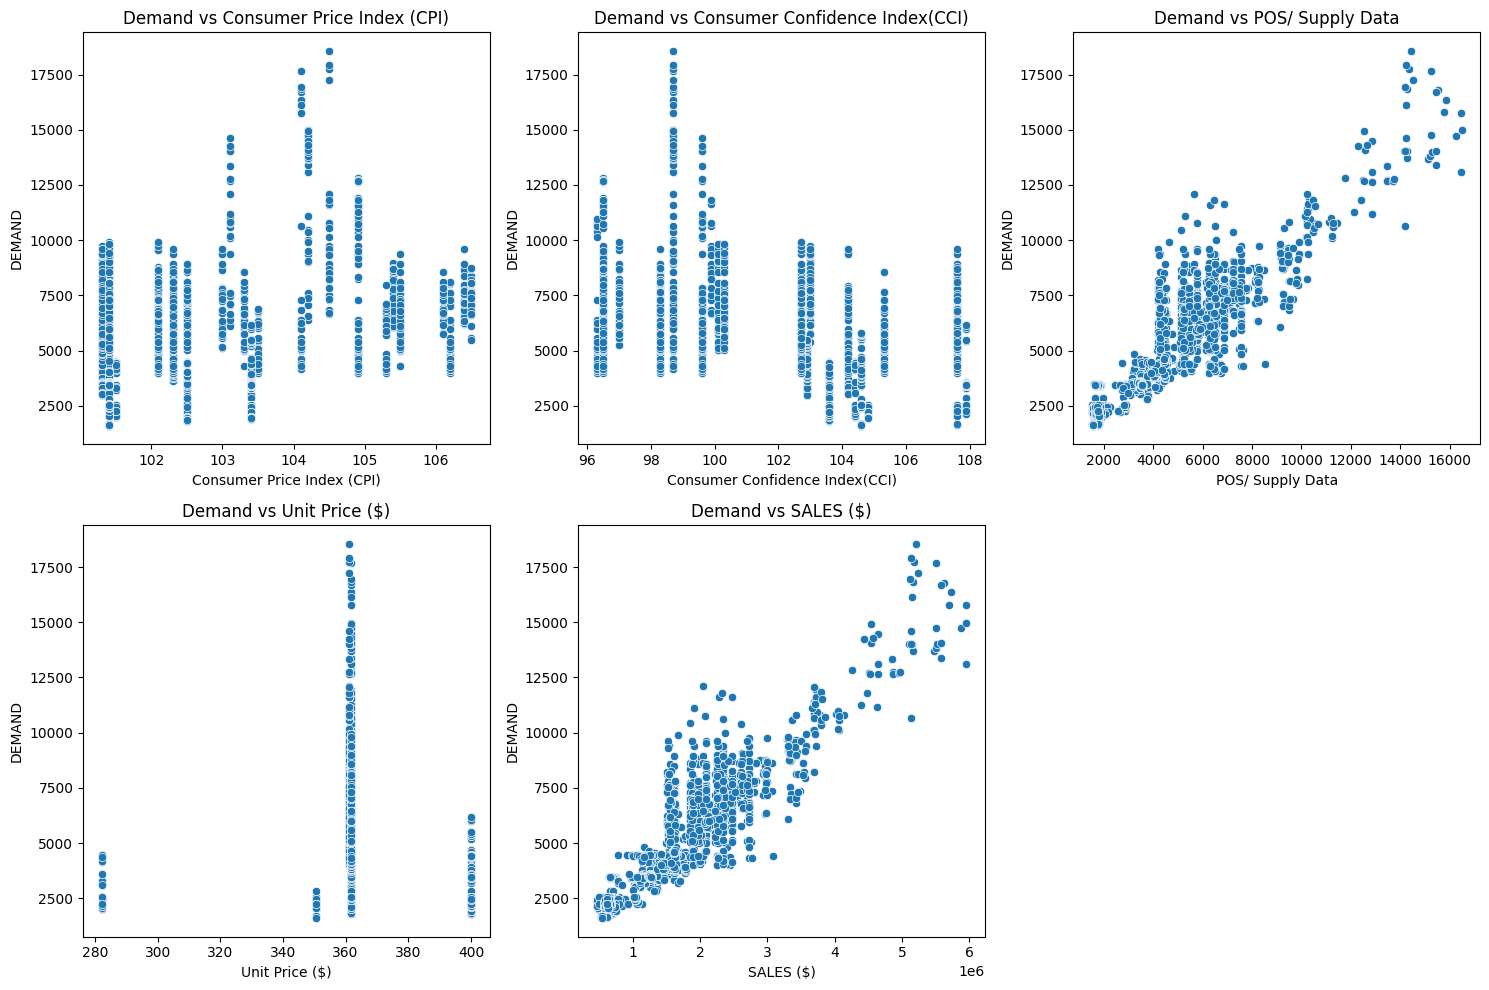

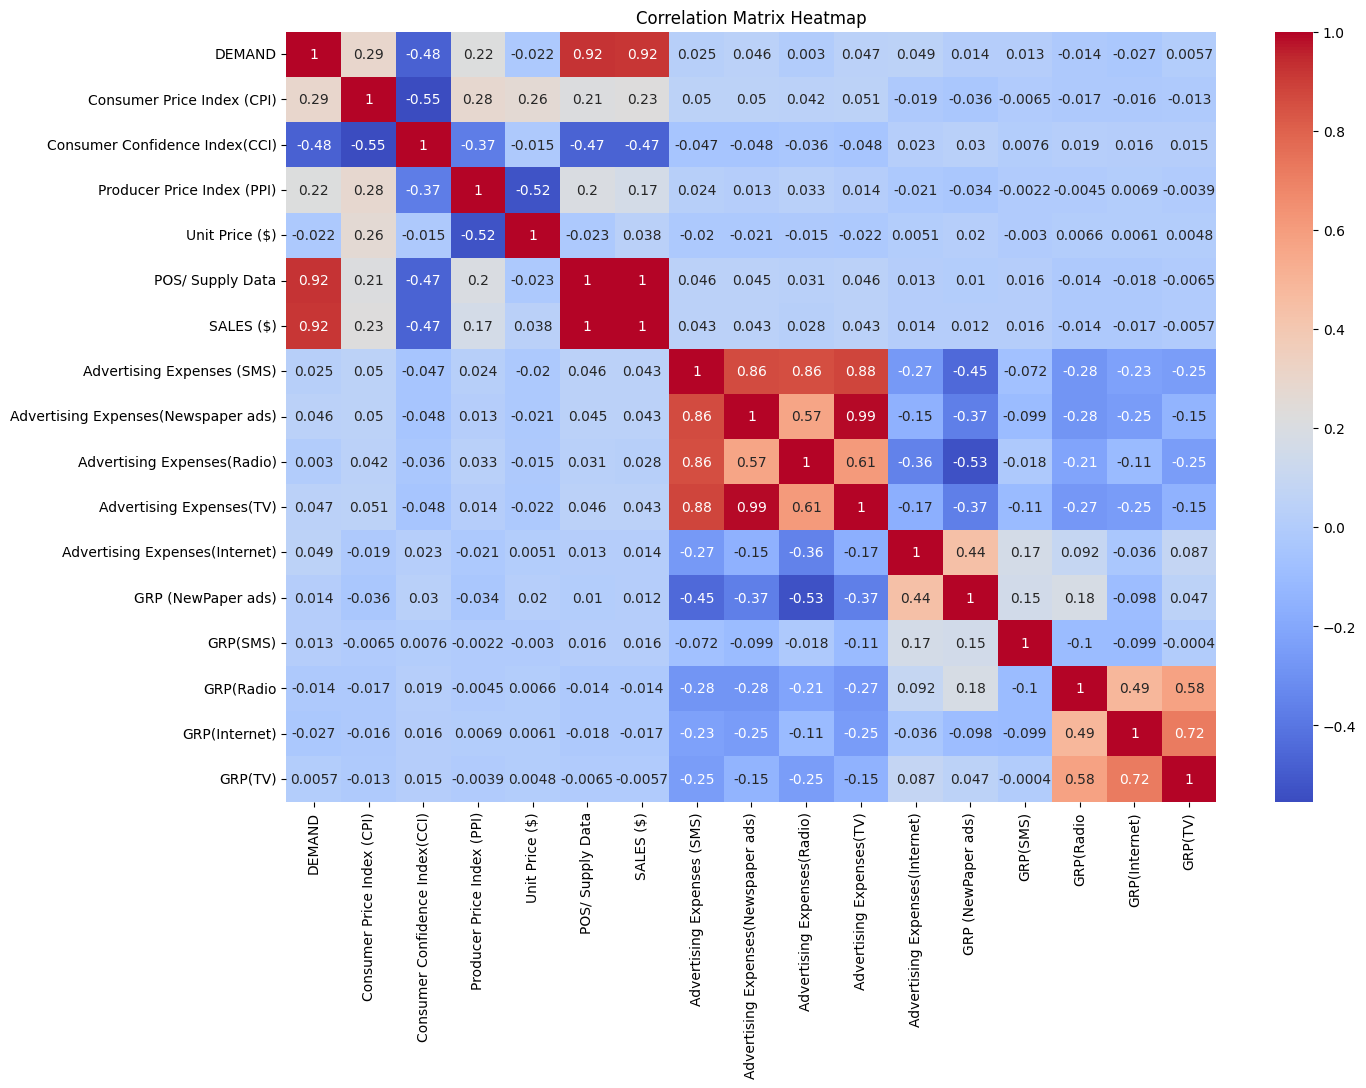

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(15, 10))
for i, column in enumerate(['Consumer Price Index (CPI)', 'Consumer Confidence Index(CCI)', 'POS/ Supply Data', 'Unit Price ($)', 'SALES ($)']):
    plt.subplot(2, 3, i+1)
    sns.scatterplot(x=column, y='DEMAND', data=data)
    plt.title(f'Demand vs {column}')
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

In [10]:
from scipy.stats import pearsonr

def pearson_correlation_test(x, y):
    corr, p_value = pearsonr(x, y)
    return corr, p_value

variables = ['Consumer Price Index (CPI)', 'Consumer Confidence Index(CCI)', 'POS/ Supply Data', 'Unit Price ($)', 'SALES ($)']
for var in variables:
    corr, p_value = pearson_correlation_test(data[var], data['DEMAND'])
    print(f'Pearson Correlation between DEMAND and {var}: {corr:.2f} (p-value: {p_value:.2e})')

    corr, p_value = pearson_correlation_test(data[var], data['SALES ($)'])
    print(f'Pearson Correlation between SALES and {var}: {corr:.2f} (p-value: {p_value:.2e})')

Pearson Correlation between DEMAND and Consumer Price Index (CPI): 0.29 (p-value: 5.72e-52)
Pearson Correlation between SALES and Consumer Price Index (CPI): 0.23 (p-value: 1.94e-32)
Pearson Correlation between DEMAND and Consumer Confidence Index(CCI): -0.48 (p-value: 3.84e-150)
Pearson Correlation between SALES and Consumer Confidence Index(CCI): -0.47 (p-value: 4.73e-145)
Pearson Correlation between DEMAND and POS/ Supply Data: 0.92 (p-value: 0.00e+00)
Pearson Correlation between SALES and POS/ Supply Data: 1.00 (p-value: 0.00e+00)
Pearson Correlation between DEMAND and Unit Price ($): -0.02 (p-value: 2.60e-01)
Pearson Correlation between SALES and Unit Price ($): 0.04 (p-value: 5.51e-02)
Pearson Correlation between DEMAND and SALES ($): 0.92 (p-value: 0.00e+00)
Pearson Correlation between SALES and SALES ($): 1.00 (p-value: 0.00e+00)


# **Lag Features**

In [11]:
# Creating lag features for DEMAND and SALES
for lag in range(1, 8):  # Lagging up to a week
    data[f'DEMAND_LAG_{lag}'] = data['DEMAND'].shift(lag)
    data[f'SALES_LAG_{lag}'] = data['SALES ($)'].shift(lag)

data = data.dropna()

# **Rolling Mean**
2. Creating Rolling Mean Features
Rolling mean features help in capturing trends and seasonality by averaging values over a window of time. We'll use a 7-day window to create rolling mean features

In [12]:
# Creating rolling mean features for DEMAND and SALES over a week
data['DEMAND_ROLLING_MEAN_7'] = data['DEMAND'].rolling(window=7).mean()
data['SALES_ROLLING_MEAN_7'] = data['SALES ($)'].rolling(window=7).mean()
data = data.dropna()

<ipython-input-12-7ebd57533645>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['DEMAND_ROLLING_MEAN_7'] = data['DEMAND'].rolling(window=7).mean()
<ipython-input-12-7ebd57533645>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['SALES_ROLLING_MEAN_7'] = data['SALES ($)'].rolling(window=7).mean()


# **Interaction Features**
3. Creating Interaction Features
Interaction features can capture the combined effect of two or more variables. We'll create interaction features between advertising expenses and GRP metrics.

In [13]:
# Creating interaction features
data['SMS_GRP_INTERACTION'] = data['Advertising Expenses (SMS)'] * data['GRP(SMS)']
data['Newspaper_GRP_INTERACTION'] = data['Advertising Expenses(Newspaper ads)'] * data['GRP (NewPaper ads)']
data['Radio_GRP_INTERACTION'] = data['Advertising Expenses(Radio)'] * data['GRP(Radio']
data['TV_GRP_INTERACTION'] = data['Advertising Expenses(TV)'] * data['GRP(TV)']
data['Internet_GRP_INTERACTION'] = data['Advertising Expenses(Internet)'] * data['GRP(Internet)']

<ipython-input-13-3131f85bbc9d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['SMS_GRP_INTERACTION'] = data['Advertising Expenses (SMS)'] * data['GRP(SMS)']
<ipython-input-13-3131f85bbc9d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Newspaper_GRP_INTERACTION'] = data['Advertising Expenses(Newspaper ads)'] * data['GRP (NewPaper ads)']
<ipython-input-13-3131f85bbc9d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col

# **4. Normalizing/Standardizing Features**
Normalizing or standardizing features ensures they are on the same scale, which is important for many machine learning algorithms.

In [14]:
from sklearn.preprocessing import StandardScaler

# Selecting numeric features
numeric_features = data.select_dtypes(include=[float, int]).columns

# Standardizing the features
scaler = StandardScaler()
data[numeric_features] = scaler.fit_transform(data[numeric_features])

<ipython-input-14-5e9116978e1c>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[numeric_features] = scaler.fit_transform(data[numeric_features])


In [16]:
# Correlation analysis between GRP and Sales
grp_columns = ['GRP (NewPaper ads)', 'GRP(SMS)', 'GRP(Radio', 'GRP(Internet)', 'GRP(TV)']
sales_corr = data[grp_columns].corrwith(data['SALES ($)'])

print("Correlation between GRP and Sales:\n", sales_corr)

Correlation between GRP and Sales:
 GRP (NewPaper ads)    0.012830
GRP(SMS)              0.016170
GRP(Radio            -0.013535
GRP(Internet)        -0.016973
GRP(TV)              -0.005601
dtype: float64


3. Interaction Analysis Between GRP and Advertising Expenses
We will create interaction features between GRP and advertising expenses to capture their combined effect on sales.

In [17]:
# Creating interaction features
data['SMS_GRP_INTERACTION'] = data['Advertising Expenses (SMS)'] * data['GRP(SMS)']
data['Newspaper_GRP_INTERACTION'] = data['Advertising Expenses(Newspaper ads)'] * data['GRP (NewPaper ads)']
data['Radio_GRP_INTERACTION'] = data['Advertising Expenses(Radio)'] * data['GRP(Radio']
data['TV_GRP_INTERACTION'] = data['Advertising Expenses(TV)'] * data['GRP(TV)']
data['Internet_GRP_INTERACTION'] = data['Advertising Expenses(Internet)'] * data['GRP(Internet)']

print(data[['SMS_GRP_INTERACTION', 'Newspaper_GRP_INTERACTION', 'Radio_GRP_INTERACTION', 'TV_GRP_INTERACTION', 'Internet_GRP_INTERACTION']].head())

    SMS_GRP_INTERACTION  Newspaper_GRP_INTERACTION  Radio_GRP_INTERACTION  \
13             0.384666                  -0.225558              -0.082827   
14             0.349039                  -0.421113              -0.223593   
15             0.077567                  -0.333231              -0.171061   
16             0.404176                  -0.572601              -0.157291   
17            -0.387629                  -0.445527              -0.224527   

    TV_GRP_INTERACTION  Internet_GRP_INTERACTION  
13           -0.117176                  0.141910  
14           -0.148983                  0.122680  
15           -0.210191                  0.063349  
16           -0.360143                  0.014440  
17           -0.173071                  0.053330  


1. Visualize Demand, Supply, and Sales Over Time
We will plot demand, supply, and sales over time to understand their trends.

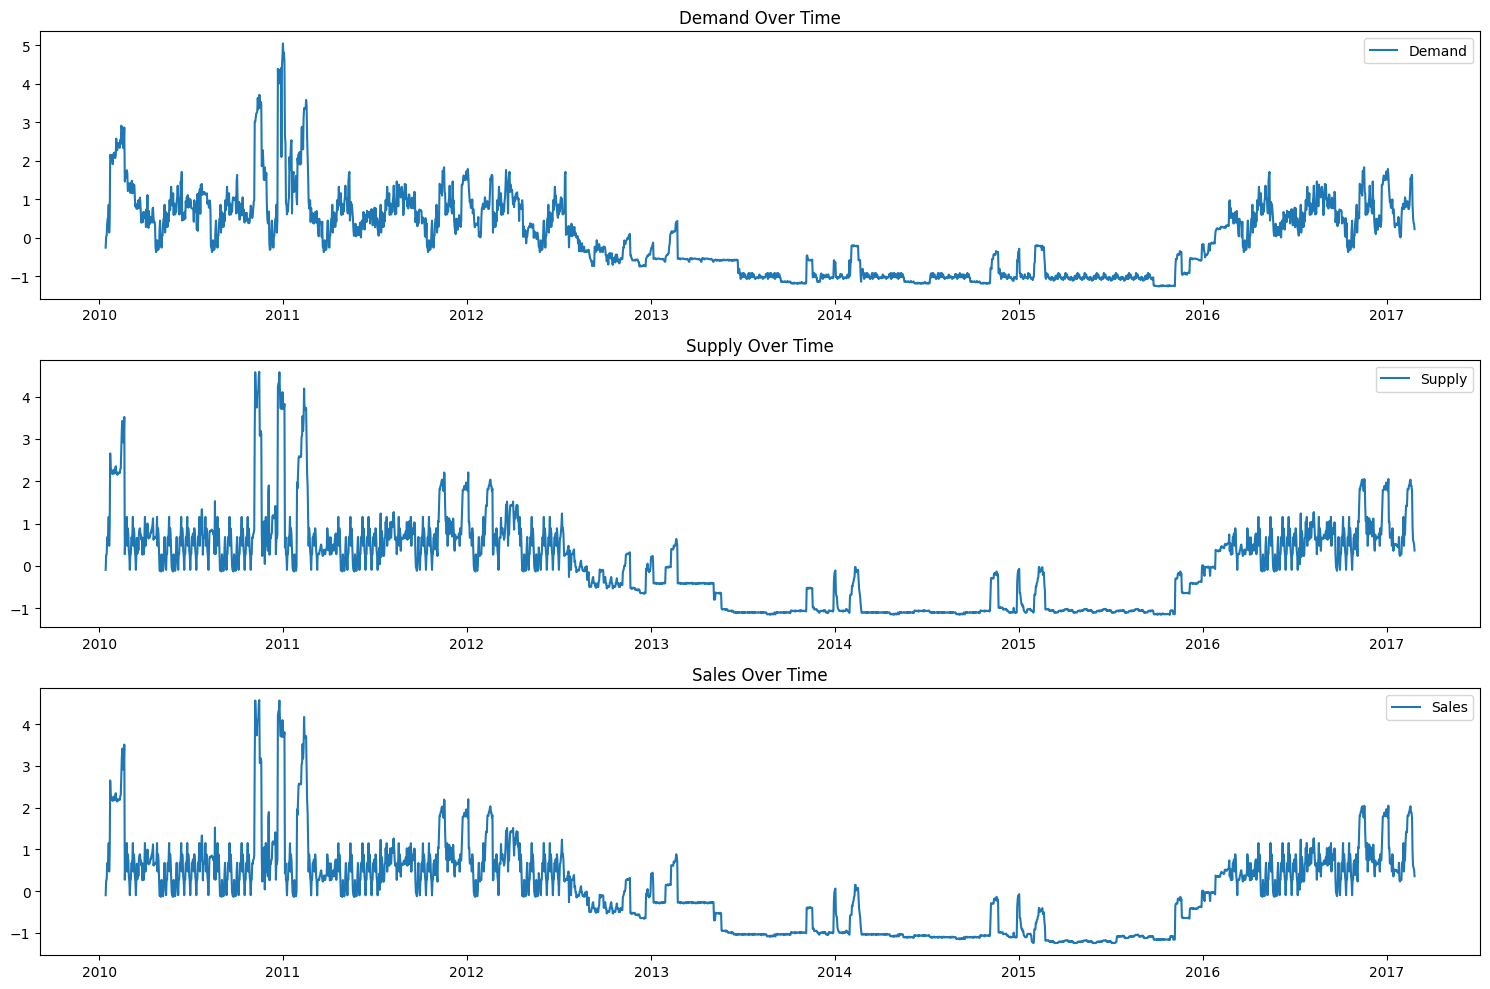

In [18]:
import matplotlib.pyplot as plt

# Plotting Demand, Supply, and Sales over time
plt.figure(figsize=(15, 10))

plt.subplot(3, 1, 1)
plt.plot(data['DATE'], data['DEMAND'], label='Demand')
plt.legend()
plt.title('Demand Over Time')

plt.subplot(3, 1, 2)
plt.plot(data['DATE'], data['POS/ Supply Data'], label='Supply')
plt.legend()
plt.title('Supply Over Time')

plt.subplot(3, 1, 3)
plt.plot(data['DATE'], data['SALES ($)'], label='Sales')
plt.legend()
plt.title('Sales Over Time')

plt.tight_layout()
plt.show()

2. Analyze Marketing Platform Impact on Sales
We will create scatter plots to visualize the relationship between sales and advertising expenses for each marketing platform.

3. Visualize Advertising Expenses and GRP for Each Platform
We will plot advertising expenses and GRP for each platform over time to understand their trends and combined effect.

In [22]:
from plotly.subplots import make_subplots

In [23]:
fig = make_subplots(rows=3, cols=2, subplot_titles=[
    'Sales vs Advertising Expenses (SMS)',
    'Sales vs Advertising Expenses (Newspaper ads)',
    'Sales vs Advertising Expenses (Radio)',
    'Sales vs Advertising Expenses (TV)',
    'Sales vs Advertising Expenses (Internet)'
])

fig.add_trace(go.Scatter(x=data['Advertising Expenses (SMS)'], y=data['SALES ($)'], mode='markers', name='SMS'), row=1, col=1)
fig.add_trace(go.Scatter(x=data['Advertising Expenses(Newspaper ads)'], y=data['SALES ($)'], mode='markers', name='Newspaper ads'), row=1, col=2)
fig.add_trace(go.Scatter(x=data['Advertising Expenses(Radio)'], y=data['SALES ($)'], mode='markers', name='Radio'), row=2, col=1)
fig.add_trace(go.Scatter(x=data['Advertising Expenses(TV)'], y=data['SALES ($)'], mode='markers', name='TV'), row=2, col=2)
fig.add_trace(go.Scatter(x=data['Advertising Expenses(Internet)'], y=data['SALES ($)'], mode='markers', name='Internet'), row=3, col=1)

fig.update_layout(title='Sales vs Advertising Expenses for Different Platforms', height=800, showlegend=False)
fig.show()

In [24]:
fig = make_subplots(rows=5, cols=2, subplot_titles=[
    'Advertising Expenses (SMS)', 'GRP (SMS)',
    'Advertising Expenses (Newspaper ads)', 'GRP (Newspaper ads)',
    'Advertising Expenses (Radio)', 'GRP (Radio)',
    'Advertising Expenses (TV)', 'GRP (TV)',
    'Advertising Expenses (Internet)', 'GRP (Internet)'
])

# SMS
fig.add_trace(go.Scatter(x=data['DATE'], y=data['Advertising Expenses (SMS)'], mode='lines', name='Advertising Expenses (SMS)'), row=1, col=1)
fig.add_trace(go.Scatter(x=data['DATE'], y=data['GRP(SMS)'], mode='lines', name='GRP (SMS)'), row=1, col=2)

# Newspaper ads
fig.add_trace(go.Scatter(x=data['DATE'], y=data['Advertising Expenses(Newspaper ads)'], mode='lines', name='Advertising Expenses (Newspaper ads)'), row=2, col=1)
fig.add_trace(go.Scatter(x=data['DATE'], y=data['GRP (NewPaper ads)'], mode='lines', name='GRP (Newspaper ads)'), row=2, col=2)

# Radio
fig.add_trace(go.Scatter(x=data['DATE'], y=data['Advertising Expenses(Radio)'], mode='lines', name='Advertising Expenses (Radio)'), row=3, col=1)
fig.add_trace(go.Scatter(x=data['DATE'], y=data['GRP(Radio'], mode='lines', name='GRP (Radio)'), row=3, col=2)

# TV
fig.add_trace(go.Scatter(x=data['DATE'], y=data['Advertising Expenses(TV)'], mode='lines', name='Advertising Expenses (TV)'), row=4, col=1)
fig.add_trace(go.Scatter(x=data['DATE'], y=data['GRP(TV)'], mode='lines', name='GRP (TV)'), row=4, col=2)

# Internet
fig.add_trace(go.Scatter(x=data['DATE'], y=data['Advertising Expenses(Internet)'], mode='lines', name='Advertising Expenses (Internet)'), row=5, col=1)
fig.add_trace(go.Scatter(x=data['DATE'], y=data['GRP(Internet)'], mode='lines', name='GRP (Internet)'), row=5, col=2)

fig.update_layout(title='Advertising Expenses and GRP Over Time for Different Platforms', height=2000, showlegend=False)
fig.show()

# **Step 5: Calculating Summary Statistics in Detail**
To understand the distribution and central tendencies of the variables, we will calculate detailed summary statistics for the dataset. This includes measures like mean, median, standard deviation, minimum, maximum, and quartiles.

In [25]:
summary_stats = data.describe()
print(summary_stats)

                      DATE        DEMAND  Consumer Price Index (CPI)  \
count                 2600  2.600000e+03                2.600000e+03   
mean   2013-08-05 12:00:00 -1.311771e-16                1.724979e-14   
min    2010-01-14 00:00:00 -1.270279e+00               -9.443984e-01   
25%    2011-10-25 18:00:00 -9.628629e-01               -8.716706e-01   
50%    2013-08-05 12:00:00 -1.440804e-01               -2.171204e-01   
75%    2015-05-17 06:00:00  6.739578e-01                5.828853e-01   
max    2017-02-25 00:00:00  5.039930e+00                2.837447e+00   
std                    NaN  1.000192e+00                1.000192e+00   

       Consumer Confidence Index(CCI)  Producer Price Index (PPI)  \
count                    2.600000e+03                2.600000e+03   
mean                    -6.340227e-15               -6.362090e-15   
min                     -2.195178e+00               -1.345960e+00   
25%                     -1.551021e-01               -8.999368e-01   
50%   

In [26]:
# Detailed statistics for specific columns
demand_stats = data['DEMAND'].describe()
sales_stats = data['SALES ($)'].describe()
supply_stats = data['POS/ Supply Data'].describe()

print("Demand Summary Statistics:\n", demand_stats)
print("Sales Summary Statistics:\n", sales_stats)
print("Supply Summary Statistics:\n", supply_stats)

Demand Summary Statistics:
 count    2.600000e+03
mean    -1.311771e-16
std      1.000192e+00
min     -1.270279e+00
25%     -9.628629e-01
50%     -1.440804e-01
75%      6.739578e-01
max      5.039930e+00
Name: DEMAND, dtype: float64
Sales Summary Statistics:
 count    2.600000e+03
mean    -2.623542e-16
std      1.000192e+00
min     -1.248726e+00
25%     -1.027189e+00
50%     -3.815043e-02
75%      6.634822e-01
max      4.576937e+00
Name: SALES ($), dtype: float64
Supply Summary Statistics:
 count    2.600000e+03
mean     8.745141e-17
std      1.000192e+00
min     -1.154136e+00
25%     -1.052202e+00
50%     -5.106458e-02
75%      6.733951e-01
max      4.583293e+00
Name: POS/ Supply Data, dtype: float64


In [53]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

data = pd.read_excel('MMM_data.xlsx')

data = data.dropna()

# Convert DATE to datetime
data['DATE'] = pd.to_datetime(data['DATE'])

features = [
    'Consumer Price Index (CPI)', 'Consumer Confidence Index(CCI)', 'Producer Price Index (PPI)',
    'Unit Price ($)', 'POS/ Supply Data', 'Advertising Expenses (SMS)', 'Advertising Expenses(Newspaper ads)',
    'Advertising Expenses(Radio)', 'Advertising Expenses(TV)', 'Advertising Expenses(Internet)'
]
target = 'SALES ($)'

X = data[features]
y = data[target]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")

coefficients = pd.DataFrame({
    'Feature': features,
    'Coefficient': model.coef_
})

coefficients['Effectiveness'] = coefficients['Coefficient'] * scaler.scale_
print(coefficients)

Mean Absolute Error: 11432.31334592264
R-squared: 0.9994451772690052
                               Feature    Coefficient  Effectiveness
0           Consumer Price Index (CPI)    4886.552311   6.748774e+03
1       Consumer Confidence Index(CCI)    5581.680610   1.767503e+04
2           Producer Price Index (PPI)   -2765.423997  -5.634231e+03
3                       Unit Price ($)   54086.290833   1.426142e+06
4                     POS/ Supply Data  943261.883875   2.455781e+09
5           Advertising Expenses (SMS)     291.009233   3.944512e+03
6  Advertising Expenses(Newspaper ads)    1975.341409   2.207863e+03
7          Advertising Expenses(Radio)   -1455.806440  -1.829592e+04
8             Advertising Expenses(TV)   -2123.171994  -2.625380e+05
9       Advertising Expenses(Internet)    -156.016309  -2.372384e+05


In [56]:
def predict_sales_and_recommend(budget_input):
    sample_input = pd.DataFrame({
        'Consumer Price Index (CPI)': [1.0],  # Default values for other features
        'Consumer Confidence Index(CCI)': [1.0],
        'Producer Price Index (PPI)': [1.0],
        'Unit Price ($)': [1.0],
        'POS/ Supply Data': [1.0],
        'Advertising Expenses (SMS)': [budget_input['Advertising Expenses (SMS)']],
        'Advertising Expenses(Newspaper ads)': [budget_input['Advertising Expenses(Newspaper ads)']],
        'Advertising Expenses(Radio)': [budget_input['Advertising Expenses(Radio)']],
        'Advertising Expenses(TV)': [budget_input['Advertising Expenses(TV)']],
        'Advertising Expenses(Internet)': [budget_input['Advertising Expenses(Internet)']]
    })

    # Standardizing the input using the same scaler
    sample_input_standardized = scaler.transform(sample_input)

    # Make predictions
    predicted_sales = model.predict(sample_input_standardized)

    # Analyzing the model coefficients
    coefficients = pd.DataFrame({
        'Feature': features,
        'Coefficient': model.coef_
    })
    coefficients['Effectiveness'] = coefficients['Coefficient'] * scaler.scale_

    # Providing recommendation based on the highest positive coefficient
    recommendation = coefficients.loc[coefficients['Effectiveness'].idxmax()]

    return predicted_sales[0], recommendation

# Sample budget input for prediction
budget_input = {
    'Advertising Expenses (SMS)': 1000,
    'Advertising Expenses(Newspaper ads)': 1000,
    'Advertising Expenses(Radio)': 1000,
    'Advertising Expenses(TV)': 1000,
    'Advertising Expenses(Internet)': 1000
}

# Predicting sales and providing recommendation
predicted_sales, recommendation = predict_sales_and_recommend(budget_input)

print("Predicted Sales:", predicted_sales)
print(f"Recommendation: Investing more in {recommendation['Feature']} might improve the sales.")

Predicted Sales: 523372.547124587
Recommendation: Investing more in POS/ Supply Data might improve the sales.
